In [1]:
from platform import python_version

print(python_version())

3.8.5


In [2]:
#!pip install refextract
#! pip install tika
#!pip install python-magic-bin==0.4.14
#!pip install pdfx

In [3]:
from tika import parser 
import re
from re import search
import os
import pandas as pd
from sklearn.decomposition import PCA
import pdfx


C:\Users\alice\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.25.11) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
C:\Users\alice\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\alice\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\alice\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\alice\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\alice\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\alice\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\alice\anacond

In [4]:
ARTICLE = 1
ABSTRACT = 2
REFERENCES = 3

FLAG = ARTICLE

pd.options.display.max_rows = 200
pd.set_option('display.max_colwidth', None)

In [5]:
path = "C:\\Users\\alice\\Desktop\\papers3"#"H:\\Dropbox\\Personale\\Ricerca\\XAI\\00. A.Gatti\\Quantitative AI\\GreenAI\\Articolo\\Bibliografia\TUTTI"

In [6]:
def get_content(filename):
     raw = parser.from_file(filename)
     return raw['content'].lower()

In [7]:
def get_reference(filename):
    raw = parser.from_file(filename)
    text = raw['content'].lower()

    # get only text after word `References`
    pos = text.lower().find('references')
    return text[pos+len('references '):]
    
    # print line by line
    #for line in text.split('\n\n'):
        #print(line)
        #print('---')

In [8]:
def get_references():
    short, names, articles = find_all_files()
    references = []
    
    for article in articles:
        references.append(get_reference(article))

    return short, names, articles, references

In [9]:
def get_abstract(filename):
    start = 'abstract'
    end = 'introduction'
    
    raw = parser.from_file(filename)
    s = raw['content'].lower()
    
    if search(start, s):
        s = s.split(start)[1].split(end)[0]
        #res = re.sub('[^A-Za-z0-9]+', ' ', s).strip()
        res = re.sub('[^A-Za-z]+', ' ', s).strip()
    else:
        res = ""

    return res

In [10]:
def find_all_files():
    shortnamelist =[]
    namelist =[]
    filelist = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if(file.endswith(".pdf")):
                filelist.append(os.path.join(root,file))
                name = re.sub('[^A-Z a-z]+', ' ', file).strip()
                namelist.append(name)
                shortnamelist.append(name[0:4])
    return shortnamelist, namelist, filelist

In [11]:
def get_abstracts():
    short, names, articles = find_all_files()
    abstracts = []
    
    for article in articles:
        abstracts.append(get_abstract(article))

    return short, names, articles, abstracts

In [12]:
def get_contents():
    short, names, articles = find_all_files()
    article_content = []
    
    for article in articles:
        article_content.append(get_content(article))

    return short, names, articles, article_content

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})

In [14]:
if FLAG == ARTICLE:
    shortnames, names, articles, articles_content = get_contents()
    X = vectorizer.fit_transform(articles_content)
else:
    if FLAG == ABSTRACT:
        shortnames, names, articles, abstracts = get_abstracts()
        X = vectorizer.fit_transform(abstracts)
    else:
        shortnames, names, articles, references = get_references()
        X = vectorizer.fit_transform(references)


In [15]:
for index in range(len(shortnames)):
    print(shortnames[index], names[index])

A Gr A Green er  World for A I pdf
A Sy A Systematic Review of Green AI pdf
An e An empirical study of practitioners  perspectives on green software engineering pdf
Carb Carbon Emissions and Large Neural Network Training pdf
Carb Carbontracker Tracking and Predicting the Carbon Footprint of Training Deep Learning Models pdf
Chas Chasing Carbon The Elusive Environmental Footprint of Computing pdf
Data Data Centric Green AI an exploratory empirical study pdf
Ener Energy and Policy Considerations for Deep Learning in NLP pdf
Ener Energy and Policy Considerations for Modern Deep Learning Research pdf
Ener EnergyVis Interactively Tracking and Exploring Energy Consumption for ML Models pdf
Gree Green AI Do Deep Learning Frameworks Have Different Costs pdf
Gree Green AI Schwartz  pdf
Gree Green AI Schwartz   versione pi  recente leggermente diversa pdf
Gree Green Algorithms Quantifying the carbon footprint of computation pdf
Is t Is the future of AI sustainable A case study of the EU pdf
Meas

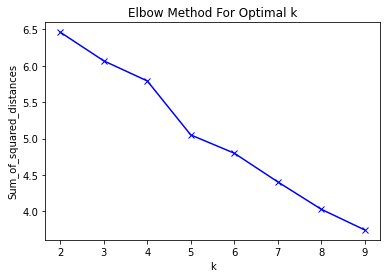

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, init='random', max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
labels

array([4, 3, 4, 4, 0, 4, 3, 3, 3, 2, 0, 3, 3, 0, 1, 1, 4, 1, 1, 1, 3, 4,
       1, 1, 4])

In [18]:
df = pd.DataFrame(list(zip(names,labels)),columns=['Article','Cluster'])
df_s= df.sort_values(by=['Cluster'])
df_s.to_csv("clusters.csv")


In [19]:
#pdf = pdfx.PDFx("01. Energy and Policy Considerations for Deep Learning in NLP.pdf")
#metadata = pdf.get_metadata()
#references_list = pdf.get_references()
#references_dict = pdf.get_references_as_dict()
#pdf.download_pdfs("target-directory")

In [21]:
for i in range(10):
    true_k = 5
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)
    labels=model.labels_
    # labels
    df = pd.DataFrame(list(zip(names,labels)),columns=['Article','Cluster'])
    df_s= df.sort_values(by=['Cluster'])
    df_s.to_csv("clusters"+str(i)+".csv")